<a href="https://colab.research.google.com/github/saishshinde15/spam_filtering-using-NLP/blob/main/Spam_filtering_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [2]:
VOCAB_SIZE = 30000
TRAINING_SIZE = 1000
EMBEDDING_DIM = 16
EPOCHS = 15
MAX_LEN = 32
TRUNC_TYPE = 'post'
PADD_TYPE = 'post'
UNK_TOK = '<UNK>'




In [6]:
dataset = pd.read_csv('Spam dataset.csv')
dataset



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


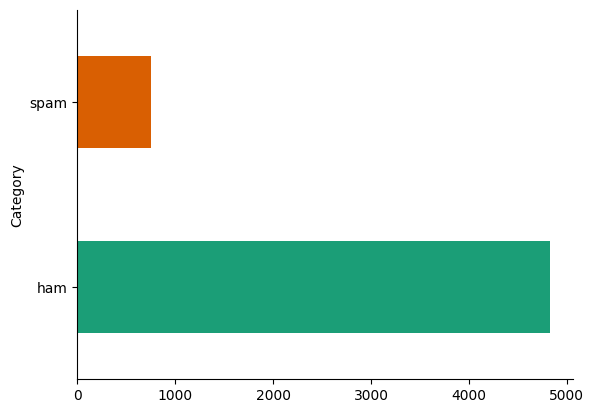

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
print(dataset.head(), '\n')

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 



In [9]:
print(dataset.isnull(), '\n')

      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns] 



In [11]:
dataset["Category"] = [1 if each == "spam" else 0 for each in dataset["Category"]]
print(dataset.head(), '\n')

   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         0  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro... 



In [13]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1, 1)
print('Type of X:', type(X))
print('shape of X: ', X.shape)


Type of X: <class 'numpy.ndarray'>
shape of X:  (5572, 1)


In [14]:
Y = dataset.iloc[:, 0].values
y = Y.reshape(-1, 1)
print('Type of Y; ', type(Y))
print('shape of Y: ', y.shape)


Type of Y;  <class 'numpy.ndarray'>
shape of Y:  (5572, 1)


In [15]:
X = X.tolist()
y = y.tolist()
print('Length of X: ', len(X), '\n')

Length of X:  5572 



In [16]:
Training_Sentences = X[TRAINING_SIZE:]
Training_Labels = y[TRAINING_SIZE:]
print('Length of training samples ', len(Training_Sentences), '\n')

Testing_Sentences = X[0: TRAINING_SIZE]
Testing_Lables = y[0:TRAINING_SIZE]
print('Length of testing samples', len(Testing_Sentences), '\n')

Length of training samples  4572 

Length of testing samples 1000 



In [49]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=UNK_TOK)
tokenizer.fit_on_texts(Training_Sentences)
word_index = tokenizer.word_index

In [18]:
Training_Sequences = tokenizer.texts_to_sequences(Training_Sentences)
Training_pad = pad_sequences(Training_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [19]:
Testing_Sequences = tokenizer.texts_to_sequences(Testing_Sentences)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))





In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            480000    
                                                                 
 bidirectional (Bidirection  (None, 32, 128)           41472     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [22]:
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)
Training_Labels = np.asarray(Training_Labels)
Testing_Lables = np.asarray(Testing_Lables)

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, Training_Labels, validation_data=(Testing_Sequences_padded, Testing_Lables), epochs=EPOCHS)

Epoch 1/15
143/143 [==============================] - 40s 199ms/step - loss: 9.2118e-08 - accuracy: 1.0000 - val_loss: 1.4127e-08 - val_accuracy: 1.0000
Epoch 2/15
143/143 [==============================] - 21s 147ms/step - loss: 8.7111e-09 - accuracy: 1.0000 - val_loss: 5.4355e-09 - val_accuracy: 1.0000
Epoch 3/15
143/143 [==============================] - 21s 150ms/step - loss: 4.0445e-09 - accuracy: 1.0000 - val_loss: 3.0142e-09 - val_accuracy: 1.0000
Epoch 4/15
143/143 [==============================] - 15s 109ms/step - loss: 2.4346e-09 - accuracy: 1.0000 - val_loss: 1.9646e-09 - val_accuracy: 1.0000
Epoch 5/15
143/143 [==============================] - 20s 138ms/step - loss: 1.6620e-09 - accuracy: 1.0000 - val_loss: 1.4033e-09 - val_accuracy: 1.0000
Epoch 6/15
143/143 [==============================] - 23s 158ms/step - loss: 1.2230e-09 - accuracy: 1.0000 - val_loss: 1.0634e-09 - val_accuracy: 1.0000
Epoch 7/15
143/143 [==============================] - 19s 136ms/step - loss: 9.461

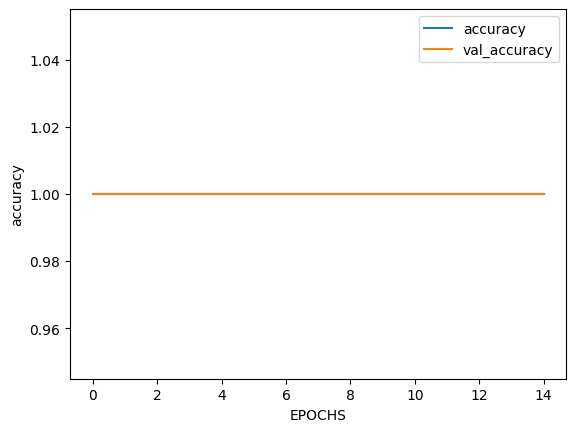

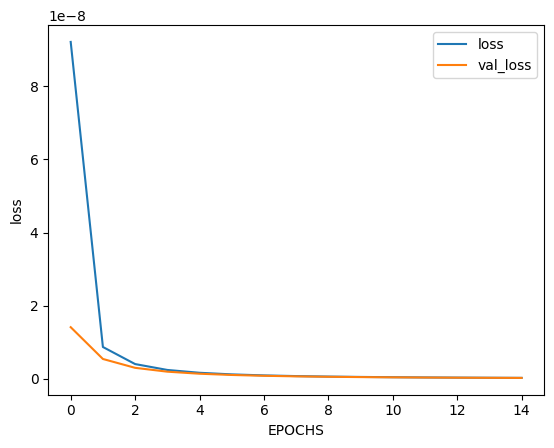

In [36]:
import matplotlib.pyplot as plt

def Plot(history, string):
    plt.plot(history.history[string])
    if 'val_' + string in history.history:
        plt.plot(history.history['val_' + string])
        plt.legend([string, 'val_' + string])
    else:
        plt.legend([string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.show()

# Example usage:
# Assuming `history` is the History object returned from model.fit()

# Plot accuracy
Plot(history, "accuracy")

# Plot loss
Plot(history, "loss")





In [45]:
text = 'Free entry to a Liverpool verses ManCity match'
print(text)
Test = tokenizer.texts_to_sequences([text])[0]
Test_padded = pad_sequences([Test], maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)
Test_padded = np.asarray(Test_padded)
print('Done')
print(Test_padded.shape)

ypred = model.predict(Test_padded)

print('output class: ', ypred)

Free entry to a Liverpool verses ManCity match
Done
(1, 32)
1/1 [==============================] - 0s 28ms/step
output class:  [[2.5638497e-10]]


In [46]:
y_pred_probs = model.predict(Testing_Sequences_padded)
y_pred = y_pred_probs.argmax(axis=1)
print(y_pred.shape)


32/32 [==============================] - 3s 88ms/step
(1000,)


In [47]:
print(Testing_Lables.shape)

(1000, 1)


In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Testing_Lables, y_pred))

1.0
